In [2]:
# ==============imports===================
import pandas as pd
import os

import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from matplotlib.ticker import FuncFormatter

In [3]:
sns.set_style("whitegrid")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

In [ ]:
# ==================args=====================
# checkpoints = ['50000', '100000', '150000', '200000']
# checkpoints = ['1000', '10000', '100000', '200000', '300000', '400000', '500000', '600000']
# checkpoints = ['1000', '100000', '200000', '300000', '400000', '600000']

# plt.style.use('ggplot')

{'Gender': {'best': 0.2385714285714285, '1000': 0.0735714285714285, '100000': 0.1385714285714286, '200000': 0.1635714285714285, '300000': 0.1892857142857142, '400000': 0.1957142857142857, '600000': 0.0578571428571428}, 'Number': {'best': 0.1974545454545454, '1000': 0.0712727272727272, '100000': 0.1283636363636363, '200000': 0.1567272727272727, '300000': 0.1556363636363636, '400000': 0.168, '600000': 0.0512727272727272}, 'POS': {'best': 0.1351282051282051, '1000': 0.0594871794871794, '100000': 0.0882051282051282, '200000': 0.0946153846153846, '300000': 0.1205128205128205, '400000': 0.1328205128205128, '600000': 0.0435897435897435}}
{'Gender': {'best': 0.2307142857142857, '1000': 0.0814285714285714, '100000': 0.1542857142857143, '200000': 0.1764285714285714, '300000': 0.2085714285714285, '400000': 0.2, '600000': 0.0585714285714285}, 'Number': {'best': 0.1814545454545454, '1000': 0.0741818181818181, '100000': 0.144, '200000': 0.145090909090909, '300000': 0.1549090909090909, '400000': 0.16

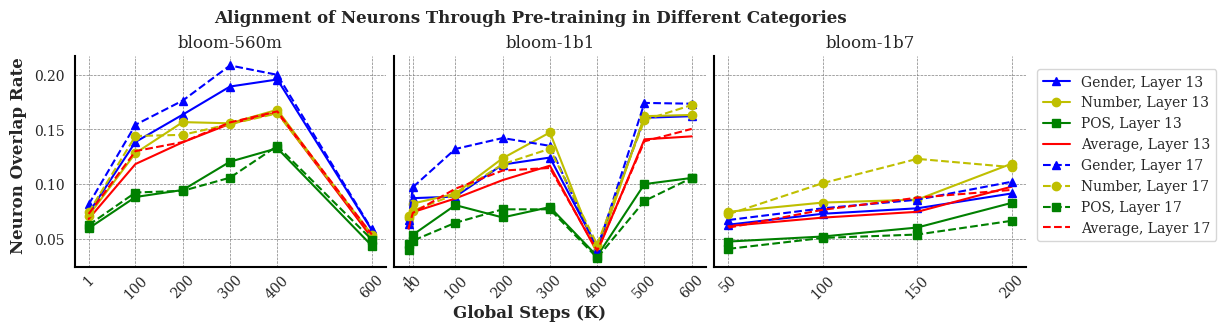

In [4]:
# ======================#1 alignment plot#==============================
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout='constrained',figsize=(10,3))
model_index = 0
for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:

    lines = ['-', '--']
    line_index = 0
    for l in ['inter-layer-13', 'inter-layer-17']:

        label = {'inter-layer-13': "Layer 13", 
        'inter-layer-17': "Layer 17"}


        ovlp_dict = pd.read_csv(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ctgr.csv', index_col=0).to_dict()

        print(ovlp_dict)
        shapes = {'Gender':'^', 'Number':'o', 'POS':'s'}
        colors = {'Gender':'b', 'Number':'y', 'POS':'g'}
        attr_index = 0
        for attr, avg_ovlp_rate in ovlp_dict.items():
            del avg_ovlp_rate['best']
            x = [int(x) for x in avg_ovlp_rate.keys()]
            y = avg_ovlp_rate.values()
            # print(x)
            # print(y)

            axs[model_index].plot(x, y, f"{colors[attr]}{shapes[attr]}{lines[line_index]}", label=f'{attr}, {label[l]}')
            axs[model_index].set_title(model)
            axs[model_index].xticks = x

            axs[model_index].spines['top'].set_color('none')
            axs[model_index].spines['right'].set_color('none')
            axs[model_index].spines['bottom'].set_color('black')
            axs[model_index].spines['left'].set_color('black')
            # plt.gca().spines['top'].set_linewidth(0)
            # plt.gca().spines['right'].set_linewidth(0)
            axs[model_index].spines['bottom'].set_linewidth(1.5)
            axs[model_index].spines['left'].set_linewidth(1.5)

            # Function to format the x-axis labels
            def format_func(value, tick_number):
                return f'{int(value/1000)}'

            # Apply the formatter to the x-axis
            axs[model_index].xaxis.set_major_formatter(FuncFormatter(format_func))

            axs[model_index].set_xticks(ticks=x)
            axs[model_index].tick_params(axis='x', which='major', labelrotation=45, direction='out', length=0, width=1)

            axs[model_index].minorticks_on()
            axs[model_index].tick_params(axis='x', which='minor', direction='in', length=5, width=1)
            # axs[model_index].spines['bottom'].set_position(('outward', 10))  # Move bottom spine outward
            # axs[model_index].spines['left'].set_position(('outward', 10)) 

            axs[model_index].grid(True, which='major', linewidth=0.5, color='gray', linestyle='--')
            
            attr_index += 1


        with open(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ckpt.txt', 'r') as f:
            read_lines = f.readlines()
            avg_ovlp_dict = {}
            for line in read_lines:
                split_list = line.split(',')
                if split_list[0] == 'best':
                    continue
                avg_ovlp_dict[int(split_list[0])] = float(split_list[1])
            ckpts, avg_ovlps = zip(*avg_ovlp_dict.items())
            axs[model_index].plot(ckpts, avg_ovlps, f"r{lines[line_index]}", label=f'Average, {label[l]}')
        line_index += 1
    
    model_index += 1

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

legend = fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = 'center left',
   bbox_to_anchor=(1, 0.5),
   bbox_transform = plt.gcf().transFigure,
   ncol=1
)

for text in legend.get_texts():
    text.set_horizontalalignment('center')

# plt.text(-0.3, 1.05, 'k', transform=plt.gcf().transFigure, fontsize=12, verticalalignment='top', horizontalalignment='left')
# plt.subplots_adjust(wspace=0.4)


# set x label
fig.text(0.5, -0.04, 'Global Steps (K)', ha='center', fontweight='bold', fontsize=12)
# set y label
fig.text(-0.02, 0.5, 'Neuron Overlap Rate', va='center', rotation='vertical', fontweight='bold', fontsize=12)

# set plot title
fig.suptitle('Alignment of Neurons Through Pre-training in Different Categories', fontweight='bold', fontsize=12)
# plt.tight_layout(rect=[0, 0.03, 0.85, 0.95])
# plt.setp(axs, xlabel='Global Steps (K)', ylabel='Neuron Overlap Rate')
plt.savefig(f'experiments/scatterplots/alignment.pdf', bbox_inches='tight') 

In [4]:
def print_pearson(variable_list_1, variable_list_2):
    pearson_corr, pearson_p_value = pearsonr(variable_list_1, variable_list_2)
    print('Pearsons correlation: %.3f' % pearson_corr)
    print('Pearsons P value: %.3f' % pearson_p_value)
    print('Pearsons P value: %.3e' % pearson_p_value)
    return pearson_corr, pearson_p_value

def print_spearman(variable_list_1, variable_list_2):
    spearman_corr, spearman_p_value = spearmanr(variable_list_1, variable_list_2)
    print('Spearmans correlation: %.3f' % spearman_corr)
    print('Spearmans P value: %.3f' % spearman_p_value)
    print('Spearmans P value: %.3e' % spearman_p_value)
    return spearman_corr, spearman_p_value

def add_identity(axes, *line_args, **line_kwargs):
    low_x, high_x = axes.get_xlim()
    low_y, high_y = axes.get_ylim()
    x = [low_x, high_x]
    y = [low_y, high_y]
    axes.plot(x, y, *line_args, **line_kwargs)
    # identity, = axes.plot([], [], *line_args, **line_kwargs)
    # def callback(axes):
    #     low_x, high_x = axes.get_xlim()
    #     low_y, high_y = axes.get_ylim()
    #     low = max(low_x, low_y)
    #     high = min(high_x, high_y)
    #     identity.set_data([low, high], [low, high])
    # callback(axes)
    # axes.callbacks.connect('xlim_changed', callback)
    # axes.callbacks.connect('ylim_changed', callback)
    # return axes

/tmp/ipykernel_3071/1039020666.py:79: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
/tmp/ipykernel_3071/1039020666.py:79: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])


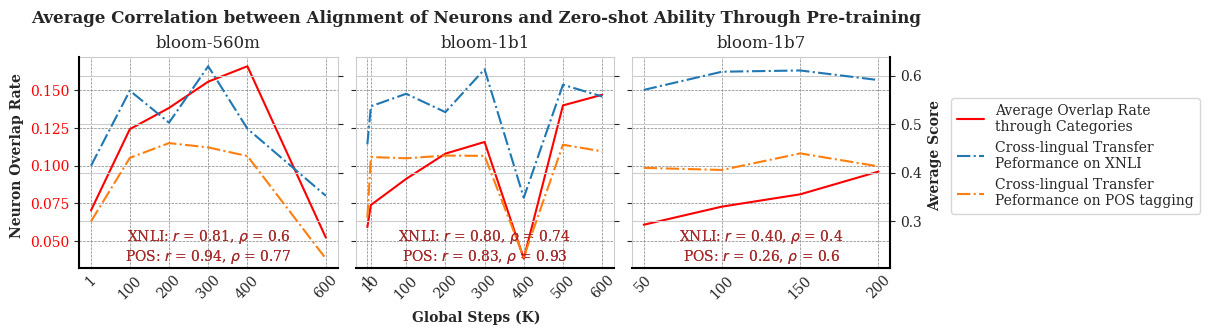

In [13]:
# ======================#2 correlation plot - curve#==============================
annotations = [r'XNLI: $r$ = 0.81, $\rho$ = 0.6', 
               r'XNLI: $r$ = 0.80, $\rho$ = 0.74',
               r'XNLI: $r$ = 0.40, $\rho$ = 0.4']

annotations_second_line = [r'POS: $r$ = 0.94, $\rho$ = 0.77', 
               r'POS: $r$ = 0.83, $\rho$ = 0.93',
               r'POS: $r$ = 0.26, $\rho$ = 0.6']

fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(9,3))
model_index = 0
axs_dup = [ax.twinx() for ax in axs]
for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:
    avg_alignment = {}
    for l in ['inter-layer-13', 'inter-layer-17']:

        with open(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ckpt.txt', 'r') as f:
            read_lines = f.readlines()
            avg_ovlp_dict = {}
            for line in read_lines:
                split_list = line.split(',')
                if split_list[0] == 'best':
                    continue
                if int(split_list[0]) not in avg_alignment:
                    avg_alignment[int(split_list[0])] = 0
                avg_alignment[int(split_list[0])] += float(split_list[1])

    for k, v in avg_alignment.items():
        avg_alignment[k] = v/2
            
    ckpts, avg_ovlps = zip(*avg_alignment.items())
    axs[model_index].plot(ckpts, avg_ovlps, "r-", label=f'Average Overlap Rate\nthrough Categories')
    var_1 = avg_ovlps
    # print(var_1)

    task_name_dict = {"XNLI": 'xnli_acc', "POS": 'f1-score'}
    for task in ["XNLI", "POS"]:
        score_dict = pd.read_csv(f'csv_files/{model}_{task_name_dict[task]}.csv', index_col=0)
        avg_scores = score_dict.mean(axis=0).to_dict()
        if 'best' in avg_scores:
            del avg_scores['best']
        x = [int(k) for k in avg_scores.keys()]
        y = avg_scores.values()
        var_2 = list(y)
        # print(var_2)
        if task == "XNLI":
            axs_dup[model_index].plot(x, y, "-.", label=f'Cross-lingual Transfer\nPeformance on {task}')     
        elif task == "POS":
            axs_dup[model_index].plot(x, y, "-.", label=f'Cross-lingual Transfer\nPeformance on {task} tagging')     
        # print(f"{model} {task} Average:")
        # print_pearson(var_1, var_2)
        # print_spearman(var_1, var_2)

        axs_dup[model_index].spines['top'].set_color('none')
        axs_dup[model_index].spines['right'].set_color('none')
        axs_dup[model_index].spines['bottom'].set_color('black')
        axs_dup[model_index].spines['left'].set_color('black')
        # plt.gca().spines['top'].set_linewidth(0)
        # plt.gca().spines['right'].set_linewidth(0)
        axs_dup[model_index].spines['bottom'].set_linewidth(1.5)
        axs_dup[model_index].spines['left'].set_linewidth(1.5)

        # Function to format the x-axis labels
        def format_func(value, tick_number):
            return f'{int(value/1000)}'

        # Apply the formatter to the x-axis
        axs[model_index].xaxis.set_major_formatter(FuncFormatter(format_func))

        axs[model_index].set_xticks(ticks=x)
        axs[model_index].tick_params(axis='x', which='major', labelrotation=45, direction='out', length=0, width=1)
        # axs[model_index].spines['bottom'].set_position(('outward', 10))  # Move bottom spine outward
        # axs[model_index].spines['left'].set_position(('outward', 10)) 

        axs[model_index].grid(True, which='major', linewidth=0.5, color='gray', linestyle='--')
        axs[model_index].text(0.5, 0.1, annotations[model_index] + '\n' + annotations_second_line[model_index], ha='center', va='center', transform=axs[model_index].transAxes, fontsize=10, color='brown')
        
    if model_index < 2:
        axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
    axs_dup[model_index].set_title(model)
    axs[model_index].tick_params(axis='y', labelcolor='red')

    
    model_index += 1

axs_dup[0].set_yticklabels([])
axs_dup[1].set_yticklabels([])
axs_dup[1].spines['left'].set_color('none')
axs_dup[2].spines['right'].set_color('black')
axs_dup[2].spines['left'].set_color('none')
axs_dup[2].spines['right'].set_linewidth(1.5)

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.text(0.5, -0.04, 'Global Steps (K)', ha='center', va='center', fontweight='bold')
fig.text(-0.01, 0.5, 'Neuron Overlap Rate', ha='center', va='center', rotation='vertical', fontweight='bold')
fig.text(1.01, 0.5, 'Average Score', ha='center', va='center', rotation='vertical', fontweight='bold')

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = 'center left',
   bbox_to_anchor=(1.02, 0.5),
   bbox_transform = plt.gcf().transFigure,
   ncol=1
)

fig.suptitle('Average Correlation between Alignment of Neurons and Zero-shot Ability Through Pre-training', fontweight='bold', fontsize=12)

plt.savefig(f'experiments/scatterplots/crslgual_curve.pdf', bbox_inches='tight')

[0.19, 0.06, 0.07, 0.12000000000000001, 0.15, 0.18, 0.05, 0.21000000000000002, 0.09, 0.18, 0.14, 0.15, 0.21000000000000002, 0.06, 0.14, 0.05, 0.07, 0.08, 0.1, 0.07, 0.03, 0.24, 0.09, 0.18, 0.30000000000000004, 0.22999999999999998, 0.23, 0.06, 0.14, 0.07, 0.05, 0.07, 0.1, 0.12, 0.04, 0.04, 0.01, 0.02, 0.04, 0.04, 0.07, 0.05, 0.33999999999999997, 0.08, 0.14, 0.19, 0.2, 0.24, 0.1, 0.07, 0.06, 0.07, 0.05, 0.1, 0.1, 0.06999999999999999, 0.16999999999999998, 0.08, 0.07, 0.09, 0.08, 0.14, 0.02, 0.14, 0.08, 0.07, 0.16999999999999998, 0.12000000000000001, 0.22, 0.06, 0.2, 0.05, 0.1, 0.18, 0.18, 0.22000000000000003, 0.0]
[0.0114291368775202, 0.1947043937566874, 0.2789352579497303, 0.3568747964255873, 0.2634427520568374, 0.3008503792231671, 0.1377541674299322, 0.6897495822259495, 0.304712783171521, 0.6596787638254724, 0.7071290944123315, 0.7278070780757098, 0.7015486560941107, 0.194896967989263, 0.3518200592172377, 0.3233300563977854, 0.3555959267581393, 0.3549286297880521, 0.3644519883608147, 0.

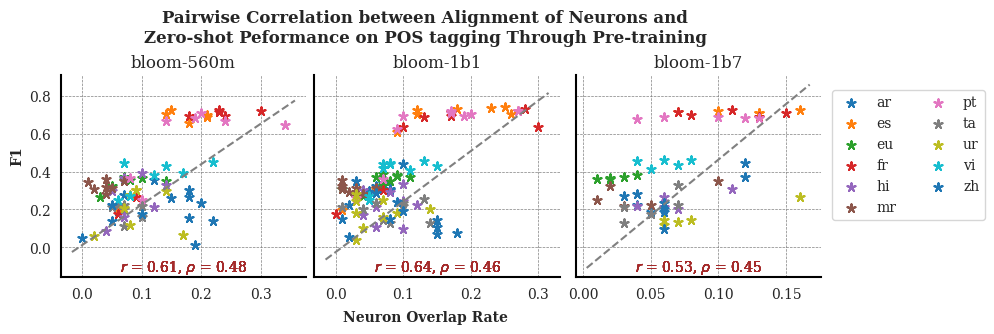

In [15]:
# ======================#3 correlation plot - scatter#==============================
annotations = [r'$r$ = 0.61, $\rho$ = 0.48', 
               r'$r$ = 0.64, $\rho$ = 0.46',
               r'$r$ = 0.53, $\rho$ = 0.45']

lang_color_dict = {}
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(8,3))
model_index = 0
task = 'f1-score' 


for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:
    var_1 = []
    var_2 = []
    
    avg_ovlp = pd.read_csv(f'csv_files/{model}_inter-layer-13_ovlp-rate_POS.csv', index_col=0)
    ovlp_df = pd.read_csv(f'csv_files/{model}_inter-layer-17_ovlp-rate_POS.csv', index_col=0)
    avg_ovlp = avg_ovlp.add(ovlp_df, fill_value=0)/2

    score_df = pd.read_csv(f'csv_files/{model}_{task}.csv', index_col=0)
    for lang in score_df.index:
        if lang == 'en':
            continue
        x = [] # score
        y = [] # ovlp
        for ckpt in score_df.columns:
            y.append(score_df[ckpt][lang])
            x.append(avg_ovlp[ckpt][lang])

        s = axs[model_index].scatter(x, y, marker=(5, 2), label=lang)
        var_1 += x
        var_2 += y

        lang_color_dict[lang] = s.get_facecolor()[0]
        axs[model_index].set_title(f'{model}')
        # axs[model_index].set_xlabel('Neuron Overlap Rate')

        axs[model_index].spines['top'].set_color('none')
        axs[model_index].spines['right'].set_color('none')
        axs[model_index].spines['bottom'].set_color('black')
        axs[model_index].spines['left'].set_color('black')
        # plt.gca().spines['top'].set_linewidth(0)
        # plt.gca().spines['right'].set_linewidth(0)
        axs[model_index].spines['bottom'].set_linewidth(1.5)
        axs[model_index].spines['left'].set_linewidth(1.5)

        axs[model_index].text(0.5, 0.05, annotations[model_index], ha='center', va='center', transform=axs[model_index].transAxes, fontsize=10, color='brown')

        # axs[model_index].spines['bottom'].set_position(('outward', 10))  # Move bottom spine outward
        # axs[model_index].spines['left'].set_position(('outward', 10)) 

        # axs[model_index].set_xticks(ticks=x)
        # axs[model_index].tick_params(axis='x', which='major', direction='out', length=0, width=1)

        # axs[model_index].minorticks_on()
        # axs[model_index].tick_params(axis='x', which='minor', direction='in', length=5, width=1)
        
        axs[model_index].grid(True, which='major', linewidth=0.5, color='gray', linestyle='--')
            


    # task_name_dict = {"XNLI": 'xnli_acc', "POS": 'f1-score'}
    # for task in ["XNLI", "POS"]:
    #     score_dict = pd.read_csv(f'csv_files/{model}_{task_name_dict[task]}.csv', index_col=0)
    #     avg_scores = score_dict.mean(axis=0).to_dict()
    #     if 'best' in avg_scores:
    #         del avg_scores['best']
    #     x = [int(k) for k in avg_scores.keys()]
    #     y = avg_scores.values()
    #     print(x)
    #     print(y)
    #     axs_dup[model_index].plot(x, y, "-.", label=task)     
    # if model_index < 2:
    #     axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
    # axs[model_index].set_title(model)
    # axs[model_index].tick_params(axis='y', labelcolor='red')
    print(var_1)
    print(var_2)
    print(f"{model} POS Pairwise:")
    print_pearson(var_1, var_2)
    print_spearman(var_1, var_2)
    
    model_index += 1

# axs[0].set_ylabel('F1', fontweight='bold')
labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

for i in range(0,3):
    add_identity(axs[i], color='grey', ls='--')

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = 'center left',
   bbox_to_anchor=(1, 0.5),
   bbox_transform = plt.gcf().transFigure,
   ncol=2
)

fig.text(0.5, -0.04, 'Neuron Overlap Rate', ha='center', va='center', fontweight='bold')
fig.text(-0.01, 0.5, 'F1', ha='center', va='center', rotation='vertical', fontweight='bold')
# fig.text(1.01, 0.5, 'Average Score', ha='center', va='center', rotation='vertical', fontweight='bold')

fig.suptitle(f'Pairwise Correlation between Alignment of Neurons and\nZero-shot Peformance on POS tagging Through Pre-training', fontweight='bold', fontsize=12)

plt.savefig(f'experiments/scatterplots/crslgual_scatter_POS.pdf', bbox_inches='tight')

bloom-560m XNLI Pairwise:
Pearsons correlation: 0.568
Pearsons P value: 0.000
Pearsons P value: 8.774e-05
Spearmans correlation: 0.535
Spearmans P value: 0.000
Spearmans P value: 2.581e-04
bloom-1b1 XNLI Pairwise:
Pearsons correlation: 0.723
Pearsons P value: 0.000
Pearsons P value: 3.081e-10
Spearmans correlation: 0.627
Spearmans P value: 0.000
Spearmans P value: 2.332e-07
bloom-1b7 XNLI Pairwise:
Pearsons correlation: 0.572
Pearsons P value: 0.001
Pearsons P value: 1.455e-03
Spearmans correlation: 0.456
Spearmans P value: 0.015
Spearmans P value: 1.466e-02


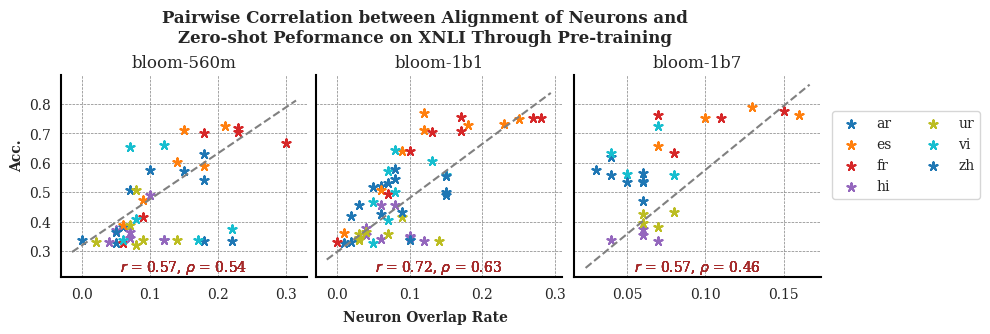

In [16]:
# ======================#3 correlation plot - scatter#==============================
annotations = [r'$r$ = 0.57, $\rho$ = 0.54',
                r'$r$ = 0.72, $\rho$ = 0.63',
                r'$r$ = 0.57, $\rho$ = 0.46']

fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(8,3))
model_index = 0
task = 'xnli_acc'

for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:
    var_1 = []
    var_2 = []
    
    avg_ovlp = pd.read_csv(f'csv_files/{model}_inter-layer-13_ovlp-rate_POS.csv', index_col=0)
    ovlp_df = pd.read_csv(f'csv_files/{model}_inter-layer-17_ovlp-rate_POS.csv', index_col=0)
    avg_ovlp = avg_ovlp.add(ovlp_df, fill_value=0)/2

    score_df = pd.read_csv(f'csv_files/{model}_{task}.csv', index_col=0)
    for lang in score_df.index:
        if lang == 'en':
            continue
        x = [] # score
        y = [] # ovlp
        for ckpt in score_df.columns:
            y.append(score_df[ckpt][lang])
            x.append(avg_ovlp[ckpt][lang])

        s = axs[model_index].scatter(x, y, color=lang_color_dict[lang], marker=(5, 2), label=lang)
        var_1 += x
        var_2 += y
        lang_color_dict[lang] = s.get_facecolor()[0]
        axs[model_index].set_title(f'{model}')
        # axs[model_index].set_xlabel('Neuron Overlap Rate')

        axs[model_index].spines['top'].set_color('none')
        axs[model_index].spines['right'].set_color('none')
        axs[model_index].spines['bottom'].set_color('black')
        axs[model_index].spines['left'].set_color('black')
        # plt.gca().spines['top'].set_linewidth(0)
        # plt.gca().spines['right'].set_linewidth(0)
        axs[model_index].spines['bottom'].set_linewidth(1.5)
        axs[model_index].spines['left'].set_linewidth(1.5)

        axs[model_index].grid(True, which='major', linewidth=0.5, color='gray', linestyle='--')
        axs[model_index].text(0.5, 0.05, annotations[model_index], ha='center', va='center', transform=axs[model_index].transAxes, fontsize=10, color='brown')
            


    # task_name_dict = {"XNLI": 'xnli_acc', "POS": 'f1-score'}
    # for task in ["XNLI", "POS"]:
    #     score_dict = pd.read_csv(f'csv_files/{model}_{task_name_dict[task]}.csv', index_col=0)
    #     avg_scores = score_dict.mean(axis=0).to_dict()
    #     if 'best' in avg_scores:
    #         del avg_scores['best']
    #     x = [int(k) for k in avg_scores.keys()]
    #     y = avg_scores.values()
    #     print(x)
    #     print(y)
    #     axs_dup[model_index].plot(x, y, "-.", label=task)     
    # if model_index < 2:
    #     axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
    # axs[model_index].set_title(model)
    # axs[model_index].tick_params(axis='y', labelcolor='red')
    # print(var_1)
    # print(var_2)
    print(f"{model} XNLI Pairwise:")
    print_pearson(var_1, var_2)
    print_spearman(var_1, var_2)
    
    model_index += 1
# axs[0].set_ylabel('Acc.')
labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

for i in range(0,3):
    add_identity(axs[i], color='grey', ls='--')

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = 'center left',
   bbox_to_anchor=(1, 0.5),
   bbox_transform = plt.gcf().transFigure,
   ncol=2
)

fig.text(0.5, -0.04, 'Neuron Overlap Rate', ha='center', va='center', fontweight='bold')
fig.text(-0.01, 0.5, 'Acc.', ha='center', va='center', rotation='vertical', fontweight='bold')
# fig.text(1.01, 0.5, 'Average Score', ha='center', va='center', rotation='vertical', fontweight='bold')

fig.suptitle(f'Pairwise Correlation between Alignment of Neurons and\nZero-shot Peformance on XNLI Through Pre-training', fontweight='bold', fontsize=12)

plt.savefig(f'experiments/scatterplots/crslgual_scatter_XNLI.pdf', bbox_inches='tight')